In [1]:
import numpy as np
import os
from astropy.io import fits
from astropy import units as u
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist
from IPython.display import Image
import glob

In [2]:
from PIL import Image
import numpy as np
import pylab as pl
pl.style.use('dark_background')

Dark subtract, do the tracing, then use star or jupiter traces to extract spectra from other images, fit line solution, measure spectral features

# Load in Files

In [3]:
scatteredsun_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\1min_scatteredsunset.FIT"
scatteredsun1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\1min_scatteredsunset_001.FIT"
scatteredsun2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\1min_scatteredsunset_002.FIT"
scatteredsun3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\1min_scatteredsunset_003.FIT"

scatteredsun_30s_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\30s_scatteredsunset.FIT"

dark_5m_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_5m001.FIT"

dark_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s001.FIT"
dark_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s002.FIT"
dark_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s003.FIT"

dark_60s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s001.FIT"
dark_60s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s002.FIT"
dark_60s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s003.FIT"

alb_a_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s001.FIT"
alb_a_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s002.FIT"
alb_a_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s003.FIT"
alb_a_30s4_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s004.FIT"
alb_a_30s5_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s005.FIT"

alb_a_60s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_60s001.FIT"
alb_a_60s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_60s002.FIT"
alb_a_60s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_60s003.FIT"

alb_b_60s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_60s001.FIT"
alb_b_60s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_60s002.FIT"
alb_b_60s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_60s003.FIT"

alb_b_300s_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_300s001.FIT"

altair_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s001.FIT"
altair_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s002.FIT"
altair_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s003.FIT"
altair_30s4_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s004.FIT"
altair_30s5_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s005.FIT"

europa_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\europa_30s001.FIT"
europa_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\europa_30s002.FIT"
europa_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\europa_30s002.FIT"

he_20s_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\he_20s.FIT"
he_20s_1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\he_20s_1.FIT"

io_10s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_10s001.FIT"
io_10s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_10s002.FIT"
io_10s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_10s003.FIT"

io_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_30s001.FIT"
io_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_30s002.FIT"
io_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_30s003.FIT"

jupiter_10s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\jupiter_10s001.FIT"
jupiter_10s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\jupiter_10s002.FIT"
jupiter_10s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\jupiter_10s003.FIT"

ne_20s_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ne_20s.FIT"

ne_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\neon_30s001.FIT"
ne_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\neon_30s002.FIT"
ne_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\neon_30s003.FIT"

ring_5m1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ring_5m_1.FIT"
ring_5m2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ring_5m_2.FIT"
ring_5m3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ring_5m_3.FIT"
ring_5m4_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ring_5m_4.FIT"

vega_30s1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s001.FIT"
vega_30s2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s002.FIT"
vega_30s3_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s003.FIT"
vega_30s4_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s004.FIT"
vega_30s5_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s005.FIT"

In [4]:
flat_1min_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\1min_scatteredsunset*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s00*.FIT")],
                        axis=0)
             )


alb_a_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_30s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

alb_a_60s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_a_60s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s00* AST4723C class.FIT")],
                        axis=0)
             )

alb_b_60s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_60s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_60s00*.FIT")],
                        axis=0)
             )

alb_b_300s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\alb_b_300s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_5m001.FIT")],
                        axis=0)
             )

altair_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\altair_30s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

europa_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\europa_30s00*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

## don't have darks for these so using 30 s - if hot pixles are sensitive then this might be an issue 
he_20s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\he_20s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

## don't have darks for these so using 30 s - if hot pixles are sensitive then this might be an issue 
io_10s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_10s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

io_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\io_30s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

## don't have darks for these so using 30 s - if hot pixles are sensitive then this might be an issue 
jupiter_10s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\jupiter_10s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

## don't have darks for these so using 30 s - if hot pixles are sensitive then this might be an issue 
ne_20s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ne_20s.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

ne_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ne_30s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )


ring_5m_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\ring_5m*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_5m001.FIT")],
                        axis=0)
             )

vega_30s_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\vega_30s*.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Oct5th2022_CTO\\dark_30s00*.FIT")],
                        axis=0)
             )

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Flats & getting a trace

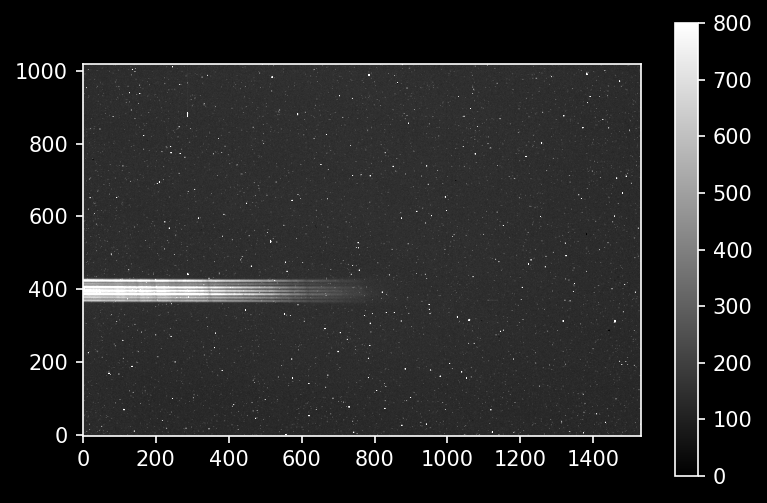

In [5]:
%matplotlib inline
import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150
pl.matplotlib.style.use('dark_background') # Optional!
pl.imshow(flat_1min_image_data, cmap='gray', vmax=0, vmin=800)
pl.colorbar()

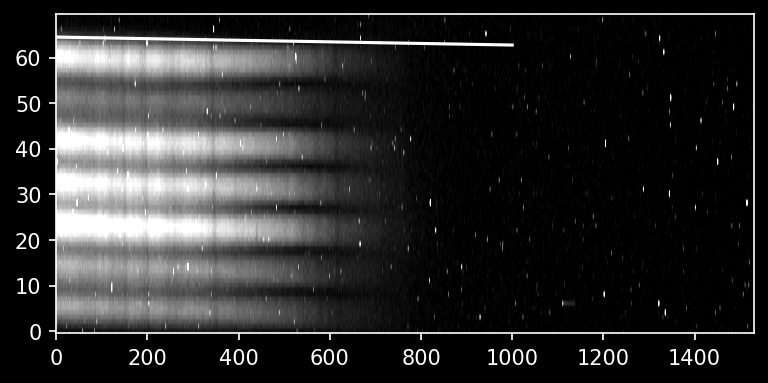

In [6]:
dy = -1.5
dx = 860
slope = dy/dx

ystart = 365
yend = 435

flat_array = np.array(flat_1min_image_data)
flat_array = flat_array - np.median(flat_1min_image_data)
pl.imshow(flat_array[ystart:yend,:], cmap='gray', vmax=800, vmin=0)
pl.plot([0,1000], 64.5 + np.array([0,1000]) * slope, color='w')
pl.gca().set_aspect(10)

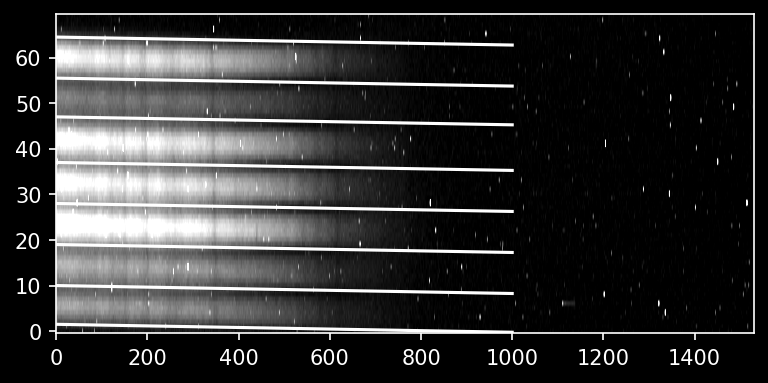

In [7]:
intertrace_cuts = np.array([1.5, 10, 19, 28, 37, 47, 55.5, 64.5])
flat_array = np.array(flat_1min_image_data)
flat_array = flat_array - np.median(flat_array)
pl.imshow(flat_array[ystart:yend,:], cmap='gray', vmax=800, vmin=0)
pl.plot([0,1000], intertrace_cuts + np.array([0,1000])[:,None] * slope, color='w')
pl.gca().set_aspect(10)

In [8]:
npixels_to_cut = 4 # very conservative - we'll see why below
xvals = np.arange(flat_array.shape[1])
trace_center = ystart+(intertrace_cuts[2] + intertrace_cuts[3])/2 + xvals * slope
cutout_trace = np.array([flat_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)]).T
cutout_trace.shape

(8, 1530)

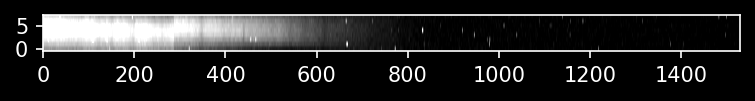

In [9]:
pl.imshow(cutout_trace, cmap='gray', vmax=800, vmin=0)
pl.gca().set_aspect(10);

moment analysis

In [10]:
# to get the y-axis values corresponding to each part of our cutout trace, we do the same operation we did on the image
yaxis_full = np.arange(flat_array.shape[0])
yaxis = np.array([yaxis_full[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut]
                    for yval, ii in zip(trace_center, xvals)]).T

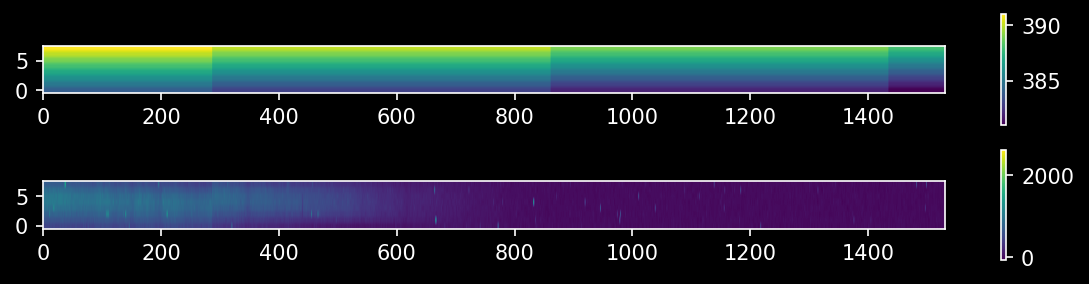

In [11]:
pl.figure(figsize=(8,2))
im = pl.subplot(2,1,1).imshow(yaxis)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
im = pl.subplot(2,1,2).imshow(cutout_trace)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
pl.tight_layout();

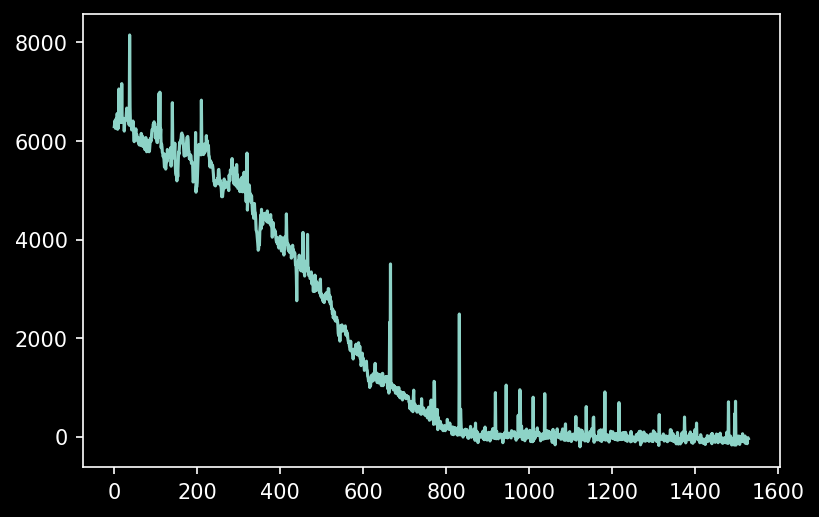

In [12]:
pl.plot(cutout_trace.sum(axis=0))

In [13]:
# moment 1 is the data-weighted average of the Y-axis coordinates
xend = 800
weighted_yaxis_values = np.average(yaxis[:,:xend], axis=0,
                                   weights=cutout_trace[:,:xend])

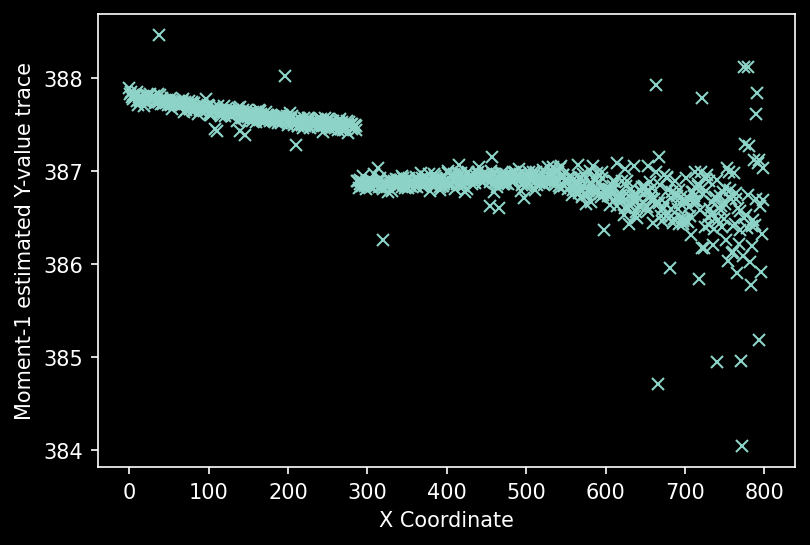

In [14]:
_=pl.plot(xvals[:xend], weighted_yaxis_values, 'x')
_=pl.xlabel("X Coordinate")
_=pl.ylabel("Moment-1 estimated Y-value trace")

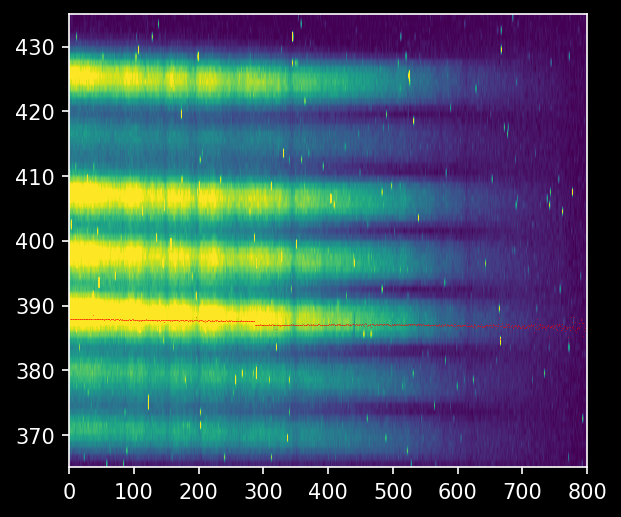

In [15]:
# we need to use the 'extent' keyword to have the axes correctly labeled
_=pl.imshow(flat_array[ystart:yend, :xend],
            extent=[0,xend,ystart,yend], vmax=800, vmin=0)
_=pl.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
_=pl.plot(xvals[:xend], weighted_yaxis_values[:xend], 'r,', alpha=0.5)
_=pl.axis((0,xend,ystart,yend))

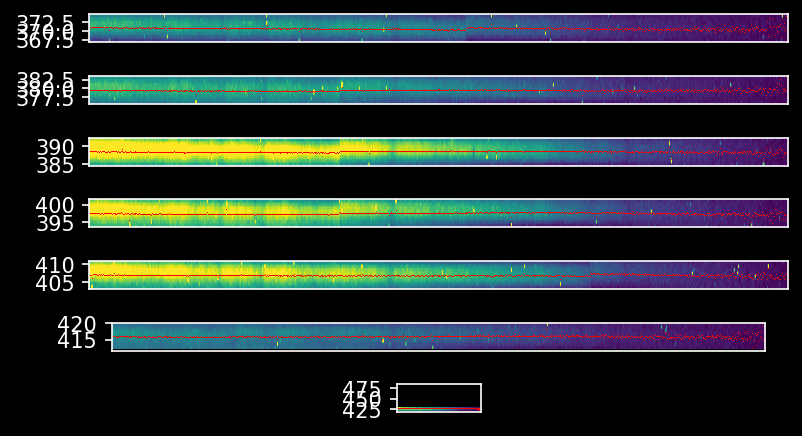

In [16]:
pl.figure(figsize=(8,3))
traces = {}
for trace_index in range(len(intertrace_cuts)-1):
    yoffset = ystart + (intertrace_cuts[trace_index] + intertrace_cuts[trace_index+1])/2
    trace_center = yoffset + slope * xvals

    cutout_trace = np.array([flat_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                        for yval, ii in zip(trace_center, xvals)]).T
    yaxis = np.array([yaxis_full[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut]
                     for yval, ii in zip(trace_center, xvals)]).T
    weighted_yaxis_values = np.average(yaxis[:,:xend], axis=0,
                                   weights=cutout_trace[:,:xend])
    
    # it takes a little mental gymnastics to get to this, but: to show the trace properly on our cutout,
    # we need to calculate the local version
    local_weighted_yaxis_values = np.average(np.arange(npixels_to_cut*2)[:,None] * np.ones(xend)[None,:],
                                             axis=0, weights=cutout_trace[:,:xend])
    
    traces[trace_index] = weighted_yaxis_values
    ax = pl.subplot(7, 1, trace_index+1)
    ax.imshow(cutout_trace[:,:xend], extent=[0, xend, yoffset-npixels_to_cut, yoffset + npixels_to_cut],vmax=800, vmin=0 )
    ax.plot(xvals[:xend], yoffset - npixels_to_cut + local_weighted_yaxis_values[:xend], 'r,')
    ax.set_aspect(4)
    ax.set_xticks([])
pl.tight_layout()

(0.0, 800.0, 365.0, 435.0)

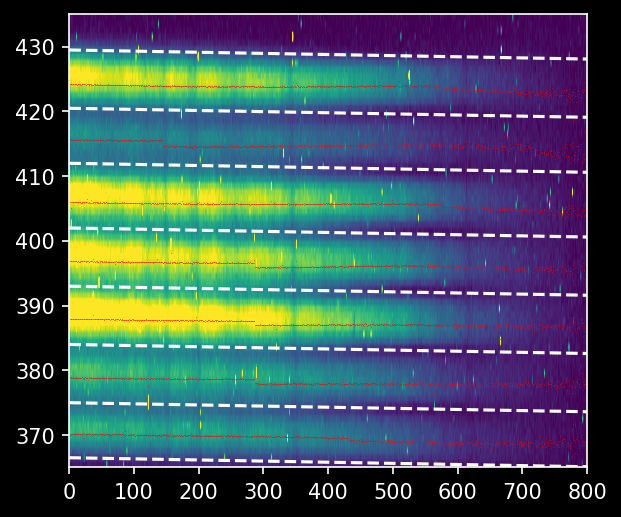

In [17]:
# then we can plot the "global" version here
pl.imshow(flat_array[ystart:yend, :xend],
          extent=[0,xend,ystart,yend], vmax=800, vmin=0)
pl.plot([0,xend], ystart + intertrace_cuts + np.array([0,xend])[:,None] * slope, color='w', linestyle='--')
pl.gca().set_aspect(10)
for trace in traces.values():
    pl.plot(xvals[:xend], trace[:xend], 'r,', alpha=0.5)
pl.axis((0,xend,ystart,yend))

Fitting Trace Profile

In [18]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter

In [19]:
# We fit a 2rd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
fitted_polymodels = {index: linfitter(polymodel, xvals[:xend], weighted_yaxis_values[:xend])
                     for index, weighted_yaxis_values in traces.items()}

In [20]:
fitted_polymodels

{0: <Polynomial1D(2, c0=370.18767438, c1=-0.00258129, c2=0.00000046)>,
 1: <Polynomial1D(2, c0=378.97155598, c1=-0.00406682, c2=0.00000325)>,
 2: <Polynomial1D(2, c0=387.93470384, c1=-0.00293566, c2=0.00000156)>,
 3: <Polynomial1D(2, c0=396.75953049, c1=-0.00196855, c2=0.00000041)>,
 4: <Polynomial1D(2, c0=405.60972145, c1=0.00136373, c2=-0.0000037)>,
 5: <Polynomial1D(2, c0=415.22937824, c1=-0.00160604, c2=-0.00000013)>,
 6: <Polynomial1D(2, c0=423.96529981, c1=-0.00042539, c2=-0.00000094)>}

(0.0, 800.0, 365.0, 435.0)

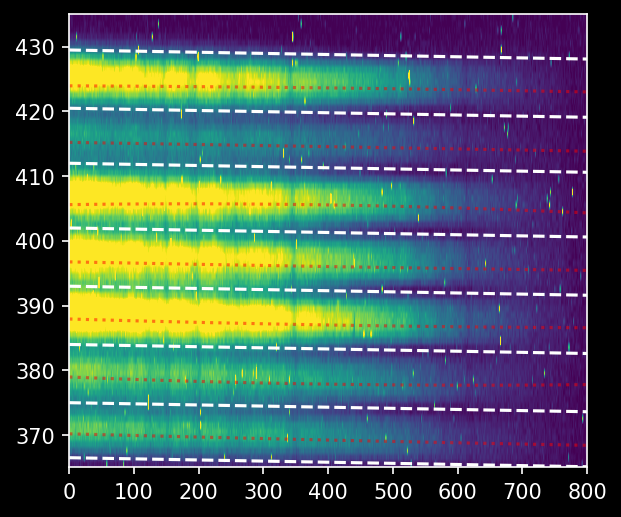

In [21]:
pl.imshow(flat_array[ystart:yend, :xend],
          extent=[0,xend,ystart,yend],
          vmin=0, vmax=700,
         )
pl.plot([0,xend], ystart + intertrace_cuts + np.array([0,xend])[:,None] * slope, color='w', linestyle='--')
pl.gca().set_aspect(10)
for tracefit in fitted_polymodels.values():
    pl.plot(xvals[:xend], tracefit(xvals[:xend]), 'r:', alpha=0.5)
pl.axis((0,xend,ystart,yend))

obtain trace profile

In [22]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=160, mean=0, stddev=5)

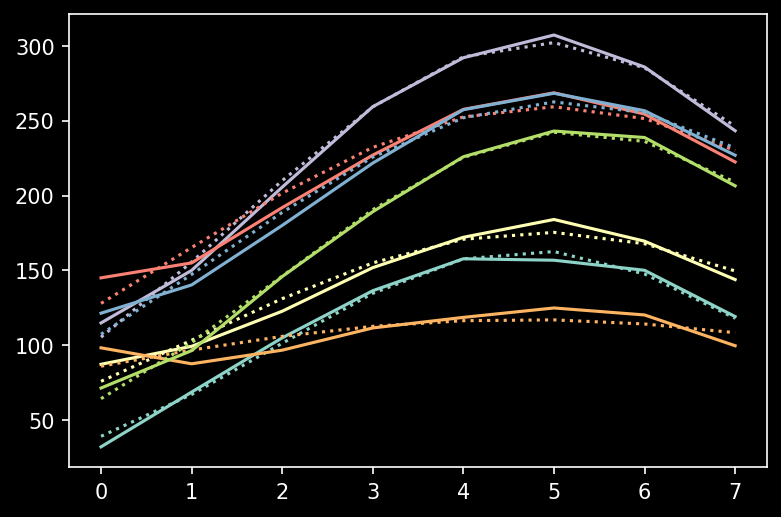

In [23]:
npixels_to_cut_trace = 4

for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([flat_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    line, = pl.plot(trace_profile, label=trace_index)
    pl.plot(trace_profile_xaxis, model_trace_profile, color=line.get_color(), linestyle=':')

extract traced spectra

In [24]:
spectra = {}
for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([flat_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    trace_avg_spectrum = np.array([np.average(
            flat_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
            weights=trace_profile)
                               for yval, ii in zip(trace_center, xvals)])
    spectra[trace_index] = trace_avg_spectrum

(0.0, 800.0)

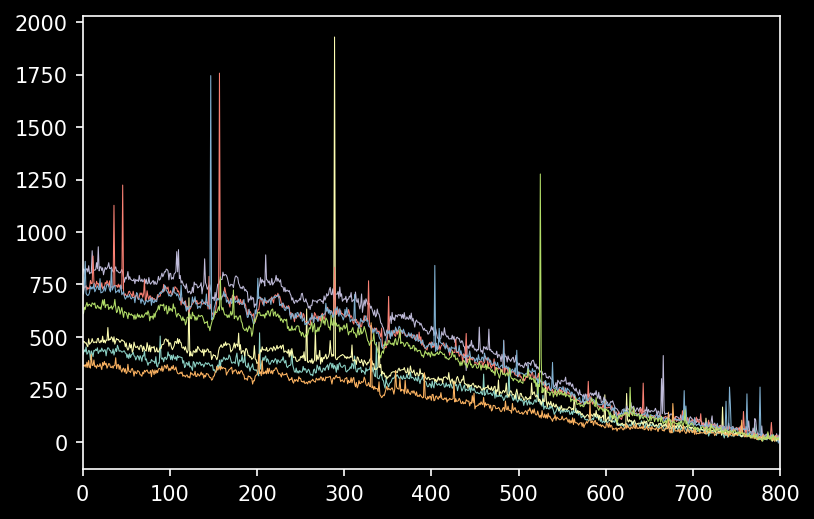

In [25]:
for index in spectra:
    pl.plot(spectra[index], linewidth=0.5)
pl.xlim(0,800)

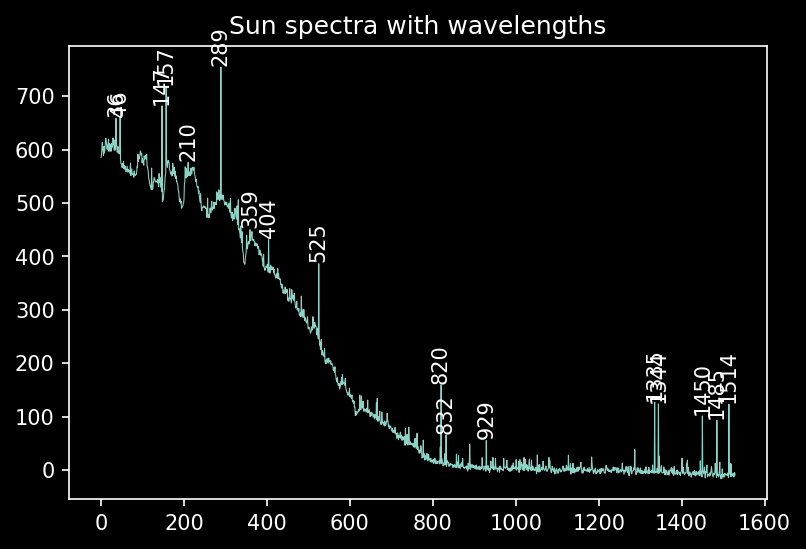

In [28]:
import scipy.signal

mean_he = np.nanmean([spectra[ind] for ind in spectra], axis = 0)
pl.plot(mean_he, linewidth = 0.5)
pl.title("Sun spectra with wavelengths")

peaks,_ = scipy.signal.find_peaks(mean_he, prominence = 50)

for peak in peaks:
    pl.text(peak,
           min([mean_he[peak] + 10, 2000]), peak,
           rotation = 90, horizontalalignment = 'center',)
    

In [29]:
peaks

array([  36,   46,  147,  157,  210,  289,  359,  404,  525,  820,  832,
        929, 1335, 1344, 1450, 1485, 1514], dtype=int64)

# Alb a 30s

In [26]:
alb_a_30s_image_data

array([[ 2.40000000e+00,  2.10000000e+01,  7.33333333e-01, ...,
         4.29866667e+02,  2.00000000e-01,  2.57333333e+01],
       [-1.33333333e+01,  1.40000000e+01,  1.28000000e+01, ...,
         2.32000000e+01,  1.36666667e+01,  3.38666667e+01],
       [ 2.02000000e+01,  2.86000000e+01,  1.01333333e+01, ...,
         1.40666667e+01,  1.28000000e+01,  1.52666667e+01],
       ...,
       [ 9.80000000e+00,  1.01333333e+01,  2.56666667e+01, ...,
         2.01333333e+01,  3.18666667e+01,  3.10666667e+01],
       [ 1.60666667e+01,  2.24666667e+01,  1.75333333e+01, ...,
         9.20000000e+00,  1.23333333e+01,  9.33333333e+00],
       [ 2.65333333e+01,  1.54666667e+01,  1.98666667e+01, ...,
         1.60000000e+01,  2.85333333e+01,  8.86666667e+00]])

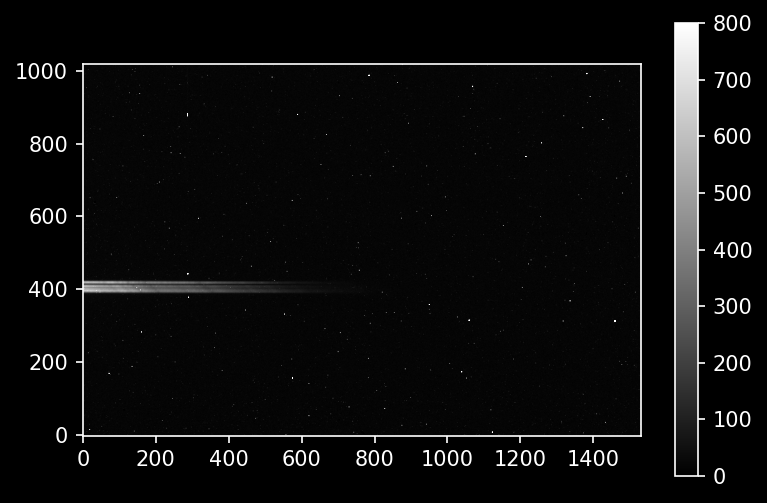

In [27]:
%matplotlib inline
import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150
pl.matplotlib.style.use('dark_background') # Optional!
pl.imshow(alb_a_30s_image_data, cmap='gray', vmax=0, vmin=800)
pl.colorbar()

In [28]:
alb_a_array = np.array(alb_a_30s_image_data)
alb_a_array = alb_a_array - np.median(alb_a_30s_image_data)

In [29]:
traces = {key: traces[key] for key in [3]}

In [30]:
# We fit a 2rd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
fitted_polymodels = {index: linfitter(polymodel, xvals[:xend], weighted_yaxis_values[:xend])
                     for index, weighted_yaxis_values in traces.items()}

In [31]:
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=160, mean=0, stddev=5)

(0.0, 800.0, 365.0, 435.0)

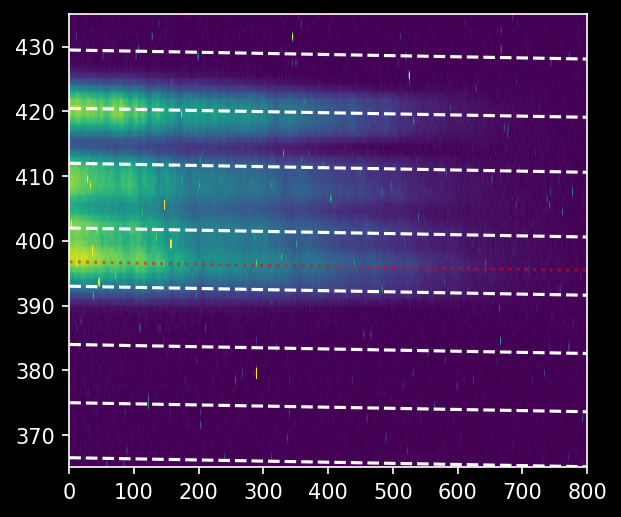

In [32]:
pl.imshow(alb_a_array[ystart:yend, :xend],
          extent=[0,xend,ystart,yend],
          vmin=0, vmax=700,
         )
pl.plot([0,xend], ystart + intertrace_cuts + np.array([0,xend])[:,None] * slope, color='w', linestyle='--')
pl.gca().set_aspect(10)

for tracefit in fitted_polymodels.values():
    pl.plot(xvals[:xend], tracefit(xvals[:xend]), 'r:', alpha=0.5)
pl.axis((0,xend,ystart,yend))

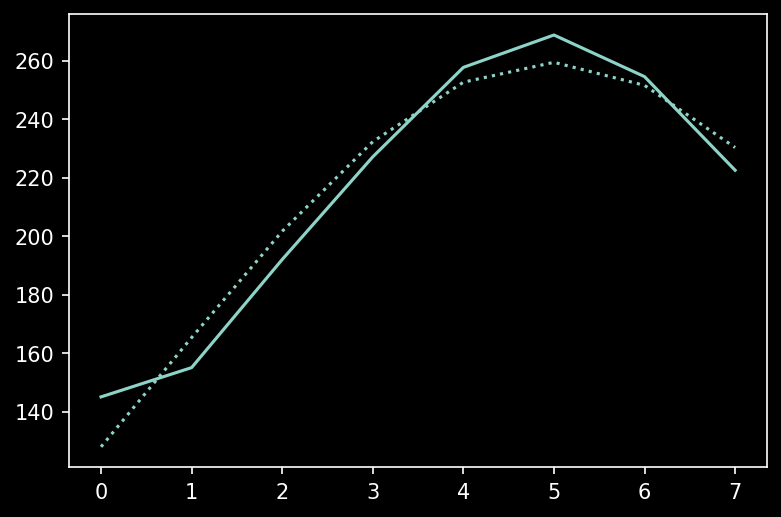

In [33]:
npixels_to_cut_trace = 4

for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([flat_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    line, = pl.plot(trace_profile, label=trace_index)
    pl.plot(trace_profile_xaxis, model_trace_profile, color=line.get_color(), linestyle=':')

In [34]:
fitted_polymodels.values()

dict_values([<Polynomial1D(2, c0=396.75953049, c1=-0.00196855, c2=0.00000041)>])

In [35]:
spectra = {}

for trace_index, polymodel_trace in fitted_polymodels.items():
    trace_center = polymodel_trace(xvals)

    cutout_trace = np.array([alb_a_array[int(yval)-npixels_to_cut_trace:int(yval)+npixels_to_cut_trace, ii]
                        for yval, ii in zip(trace_center, xvals)]).T

    trace_profile = cutout_trace.mean(axis=1)
    trace_profile_xaxis = np.arange(len(trace_profile))
    fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=trace_profile)
    model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
    
    trace_avg_spectrum = np.array([np.average(
            alb_a_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
            weights=trace_profile)
                               for yval, ii in zip(trace_center, xvals)])
    spectra[trace_index] = trace_avg_spectrum

(0.0, 800.0)

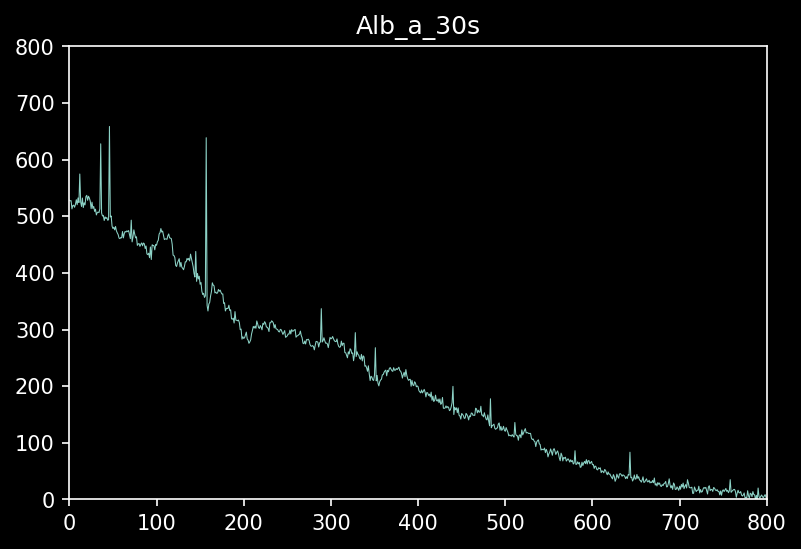

In [36]:
for index in spectra:
    pl.plot(spectra[index], linewidth=0.5)
    pl.ylim(0,800)
    pl.title("Alb_a_30s")
pl.xlim(0,800)

Retrieve the wavelength solution from helium

In [37]:
from astropy.modeling.models import Linear1D
wlmodel = Linear1D(slope=-1.00238884, intercept=-2.90420708)

In [38]:
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2cbc17839d0>

In [45]:
wavelengths = wlmodel(xvals) * u.nm
wavelengths

<Quantity [   -2.90420708,    -3.90659592,    -4.90898476, ...,
           -1533.55196576, -1534.5543546 , -1535.55674344] nm>